
Gathering Data

In [1]:
import pandas as pd 
import numpy as np
import tweepy 
import requests 
import json 
from timeit import default_timer as timer
import matplotlib
import matplotlib.pyplot as plt

# Gather

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)    
# Read Image Predictions 
df2 = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')

In [4]:
consumer_key = '6gvhiNcXBBaaPj6uvfCZ6Krto'
consumer_secret = 'gb52UXJelUr2f1Ta5jAVr180s9CCAKPB2Ixl7TEB6LbFgZDFd6'
access_token = '360319932-RVgcn0N4AyQ8MSbEjIOJZPoxUkfsp2nZZNbH7IXL'
access_secret = 'nYuSLXZhG7RW20K19awhSOLXGN6tvYgdDNH9Qsye1IzH0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [5]:
type(api)

tweepy.api.API

In [6]:
tweet_ids = df1.tweet_id.values
len(tweet_ids)

2356

In [7]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [8]:
count

2356

In [9]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
df3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

we gather from 3 different resource

# Visual and Programmatic Assessment

In [10]:
df1

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df1['rating_numerator'].value_counts()
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
df1.head(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   
6  890971913173991426                    NaN                  NaN   
7  890729181411237888                    NaN                  NaN   
8  890609185150312448                    NaN                  NaN   
9  890240255349198849                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   
6  2017-07-28 16:27:12 +0000   
7  2017-07-28 00:22:40 +0000   
8  2017-07-27 16:25:51 +0000   
9  2017-07-26 15:59:51 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   
8  <a href="http://twitter.com/download/iphone" r...   
9  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   
5  Here we have a majestic great white breaching ...                  NaN   
6  Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
7  When you watch your owner call another dog a g...                  NaN   
8  This is Zoey. She doesn't want to be one of th...                  NaN   
9  This is Cassie. She is a college pup. Studying...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
5                       NaN                        NaN   
6                       NaN                        NaN   
7                       NaN                        NaN   
8                       NaN                        NaN   
9                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7  https://twitter.com/dog_rates/status/890729181...                13   
8  https://twitter.com/dog_rates/status/890609185...                13   
9  https://twitter.com/dog_rates/status/890240255...    

In [14]:
df1.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [15]:
df1.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1180  719339463458033665                    NaN                  NaN   
943   752701944171524096                    NaN                  NaN   
707   785515384317313025                    NaN                  NaN   
1562  688211956440801280                    NaN                  NaN   
584   800141422401830912                    NaN                  NaN   
662   790987426131050500                    NaN                  NaN   
2194  668892474547511297                    NaN                  NaN   
594   798705661114773508                    NaN                  NaN   
838   767500508068192258                    NaN                  NaN   
2201  668645506898350081                    NaN                  NaN   

                      timestamp  \
1180  2016-04-11 01:41:07 +0000   
943   2016-07-12 03:11:42 +0000   
707   2016-10-10 16:20:36 +0000   
1562  2016-01-16 04:11:31 +0000   
584   2016-11-20 00:59:15 +0000   
662   2016-10-25 18:44:32 +0000   
2194  2015-11-23 20:42:48 +0000   
594   2016-11-16 01:54:03 +0000   
838   2016-08-21 23:15:55 +0000   
2201  2015-11-23 04:21:26 +0000   

                                                 source  \
1180  <a href="http://twitter.com/download/iphone" r...   
943   <a href="http://twitter.com/download/iphone" r...   
707   <a href="http://twitter.com/download/iphone" r...   
1562  <a href="http://twitter.com/download/iphone" r...   
584   <a href="http://twitter.com/download/iphone" r...   
662   <a href="http://twitter.com/download/iphone" r...   
2194  <a href="http://twitter.com/download/iphone" r...   
594   <a href="http://twitter.com/download/iphone" r...   
838   <a href="http://twitter.com/download/iphone" r...   
2201  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1180  Say hello to Lucy and Sophie. They think they'...                  NaN   
943   RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...         6.835159e+17   
707      Today, 10/10, should be National Dog Rates Day                  NaN   
1562  This is Derby. He's a superstar. 13/10 (vid by...                  NaN   
584   This is Peaches. She's the ultimate selfie sid...                  NaN   
662   This is Misty. She has a cowboy hat on her nos...                  NaN   
2194  This is Ruffles. He is an Albanian Shoop Da Wh...                  NaN   
594   RT @dog_rates: Meet Baloo. He's expecting a fa...         7.406770e+17   
838   This is Louie. He's making quite a h*ckin mess...                  NaN   
2201  Incredibly rare dog here. Good at bipedalism. ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1180                       NaN                        NaN   
943               4.196984e+09  2016-01-03 05:11:12 +0000   
707                        NaN                        NaN   
1562                       NaN                        NaN   
584                        NaN                        NaN   
662                        NaN                        NaN   
2194                       NaN                        NaN   
594               4.196984e+09  2016-06-08 22:48:46 +0000   
838                        NaN                        NaN   
2201                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1180  https://twitter.com/dog_rates/status/719339463...                10   
943   https://vine.co/v/ibvnzrauFuV,https://vine.co/...                11   
707                                                 NaN                10   
1562  https://twitter.com/dog_rates/status/688211956...                13   
584   https://twitter.com/dog_rates/status/800141422...                13   
662   https://twitter.com/dog_rates/status/790987426...                12   
2194  https://twitter.com/dog_rates/status/668892474...                11   
594   https://twit

In [16]:
df1['in_reply_to_status_id'].value_counts().max()

2

In [17]:
df1['retweeted_status_id'].isnull().count()

2356

In [18]:
df1["tweet_id"].duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2356, dtype: bool

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
len(df1[~df1.tweet_id.isin(df2.tweet_id)])

281

In [22]:
df1.retweeted_status_user_id.duplicated()

0       False
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
2326     True
2327     True
2328     True
2329     True
2330     True
2331     True
2332     True
2333     True
2334     True
2335     True
2336     True
2337     True
2338     True
2339     True
2340     True
2341     True
2342     True
2343     True
2344     True
2345     True
2346     True
2347     True
2348     True
2349     True
2350     True
2351     True
2352     True
2353     True
2354     True
2355     True
Name: retweeted_status_user_id, Length: 2356, dtype: bool

In [23]:
df1.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Tucker          10
Lola            10
Penny           10
Winston          9
Bo               9
the              8
Sadie            8
an               7
Buddy            7
Daisy            7
Bailey           7
Toby             7
Scout            6
Leo              6
Bella            6
Jack             6
Dave             6
Koda             6
Stanley          6
Oscar            6
Jax              6
Milo             6
Rusty            6
Chester          5
              ... 
Mimosa           1
Jeffri           1
Jordy            1
Trigger          1
Harlso           1
Miley            1
Amber            1
Terrenth         1
Harrison         1
Pippin           1
Emma             1
Emanuel          1
Reagan           1
Jazzy            1
Pumpkin          1
incredibly       1
infuriating      1
Humphrey         1
Brandy           1
Jay              1
Flash            1
Hector      

In [24]:
df2.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df3.head()

tweet_id  retweet_count  favorite_count display_text_range
0  892420643555336193           8263           37868            [0, 85]
1  892177421306343426           6106           32534           [0, 138]
2  891815181378084864           4042           24494           [0, 121]
3  891689557279858688           8411           41221            [0, 79]
4  891327558926688256           9110           39397           [0, 138]

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 4 columns):
tweet_id              886 non-null int64
retweet_count         886 non-null int64
favorite_count        886 non-null int64
display_text_range    886 non-null object
dtypes: int64(3), object(1)
memory usage: 27.8+ KB


### Quality

1- many coulums are empty in df1<br>
2- tweet_id must me string <br>
3- timestamp must be a timestamp not object<br>
4- some retweeted_status_user_id are duplicated<br>
5-some tweet_id in df1 are missingin df2 (image) <br>
6-numerator and denominator has incorrect value<br>
7-the number of df1 diffrent than the number of df2<br>
8- dog type must be category <br>
9- some dogs name are not valid rename it to None<br>
10-a> html tages in source column <br>

### Tidiness

1- doggo, floofer, pupper and puppo,should be merged into one (new) column <br>
2- timestamp has date and time  <br>


copy to new data

In [28]:
df1_clean = df1.copy()

# clean
change the type of time

In [29]:
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

drop duplicates if any 

In [30]:
df1_clean.drop_duplicates()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [31]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

drop unused column

In [32]:
df1_clean.drop("in_reply_to_user_id",axis=1, inplace=True)
df1_clean.drop("retweeted_status_user_id",axis=1, inplace=True)
df1_clean.drop("retweeted_status_timestamp",axis=1, inplace=True)

df1_clean.drop("retweeted_status_id",axis=1, inplace=True)
df1_clean.drop("in_reply_to_status_id",axis=1, inplace=True)

In [33]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


in df2 and df1

In [34]:
df1_clean = df1_clean[df1_clean.tweet_id.isin(df2.tweet_id)]

In [35]:
len(df1_clean[~df1_clean.tweet_id.isin(df2.tweet_id)])

0

In [36]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 210.7+ KB


change the type of tweet id 

In [37]:
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)

In [38]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 210.7+ KB


remove (a>) in source  column 

In [39]:
df1_clean.source = df1_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
df1_clean.source = df1_clean.source.astype('category')

In [40]:
df1_clean['name'].value_counts()

None           578
a               55
Charlie         11
Oliver          10
Tucker          10
Lucy            10
Cooper          10
Penny           10
Winston          8
Sadie            8
Bo               8
Lola             8
the              7
an               7
Daisy            7
Toby             7
Rusty            6
Scout            6
Koda             6
Bella            6
Jax              6
Stanley          6
Bailey           6
Dave             6
Milo             6
Louis            5
Buddy            5
Alfie            5
Larry            5
Chester          5
              ... 
Superpup         1
Pablo            1
Jeffri           1
Jordy            1
Trigger          1
Vixen            1
Zooey            1
Amber            1
Harrison         1
Pippin           1
Emma             1
Emanuel          1
Arlen            1
Jazzy            1
Pumpkin          1
incredibly       1
infuriating      1
Humphrey         1
Brandy           1
Jay              1
Flash            1
Hector      

change invalid name to none

In [41]:
df1_clean['name'][df1_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Tidiness
doggo, floofer, pupper and puppo,should be merged into one (new) column 

In [42]:
DogType = []
types = ['puppo', 'pupper', 'doggo', 'floof']
for i in df1_clean['text']:
    i = i.lower()
    for word in types:
        if word in str(i):
            DogType.append(types[types.index(word)])
            break
    else:
        DogType.append('None')
#drop
df1_clean.drop("doggo",axis=1, inplace=True)
df1_clean.drop("floofer",axis=1, inplace=True)
df1_clean.drop("pupper",axis=1, inplace=True)
df1_clean.drop("puppo",axis=1, inplace=True)

df1_clean['DogType'] = DogType



In [43]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns]
source                2075 non-null category
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
DogType               2075 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 148.0+ KB


split time and data

In [44]:
df1_clean['date'] = [d.date() for d in df1_clean['timestamp']]
df1_clean['time'] = [d.time() for d in df1_clean['timestamp']]

In [45]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns]
source                2075 non-null category
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
DogType               2075 non-null object
date                  2075 non-null object
time                  2075 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 180.4+ KB


In [46]:
df1_clean.drop("timestamp",axis=1, inplace=True)

In [47]:
df1_clean

tweet_id              source  \
0     892420643555336193  Twitter for iPhone   
1     892177421306343426  Twitter for iPhone   
2     891815181378084864  Twitter for iPhone   
3     891689557279858688  Twitter for iPhone   
4     891327558926688256  Twitter for iPhone   
5     891087950875897856  Twitter for iPhone   
6     890971913173991426  Twitter for iPhone   
7     890729181411237888  Twitter for iPhone   
8     890609185150312448  Twitter for iPhone   
9     890240255349198849  Twitter for iPhone   
10    890006608113172480  Twitter for iPhone   
11    889880896479866881  Twitter for iPhone   
12    889665388333682689  Twitter for iPhone   
13    889638837579907072  Twitter for iPhone   
14    889531135344209921  Twitter for iPhone   
15    889278841981685760  Twitter for iPhone   
16    888917238123831296  Twitter for iPhone   
17    888804989199671297  Twitter for iPhone   
18    888554962724278272  Twitter for iPhone   
19    888202515573088257  Twitter for iPhone   
20    888078434458587136  Twitter for iPhone   
21    887705289381826560  Twitter for iPhone   
22    887517139158093824  Twitter for iPhone   
23    887473957103951883  Twitter for iPhone   
24    887343217045368832  Twitter for iPhone   
25    887101392804085760  Twitter for iPhone   
26    886983233522544640  Twitter for iPhone   
27    886736880519319552  Twitter for iPhone   
28    886680336477933568  Twitter for iPhone   
29    886366144734445568  Twitter for iPhone   
...                  ...                 ...   
2326  666411507551481857  Twitter for iPhone   
2327  666407126856765440  Twitter for iPhone   
2328  666396247373291520  Twitter for iPhone   
2329  666373753744588802  Twitter for iPhone   
2330  666362758909284353  Twitter for iPhone   
2331  666353288456101888  Twitter for iPhone   
2332  666345417576210432  Twitter for iPhone   
2333  666337882303524864  Twitter for iPhone   
2334  666293911632134144  Twitter for iPhone   
2335  666287406224695296  Twitter for iPhone   
2336  666273097616637952  Twitter for iPhone   
2337  666268910803644416  Twitter for iPhone   
2338  666104133288665088  Twitter for iPhone   
2339  666102155909144576  Twitter for iPhone   
2340  666099513787052032  Twitter for iPhone   
2341  666094000022159362  Twitter for iPhone   
2342  666082916733198337  Twitter for iPhone   
2343  666073100786774016  Twitter for iPhone   
2344  666071193221509120  Twitter for iPhone   
2345  666063827256086533  Twitter for iPhone   
2346  666058600524156928  Twitter for iPhone   
2347  666057090499244032  Twitter for iPhone   
2348  666055525042405380  Twitter for iPhone   
2349  666051853826850816  Twitter for iPhone   
2350  666050758794694657  Twitter for iPhone   
2351  666049248165822465  Twitter for iPhone   
2352  666044226329800704  Twitter for iPhone   
2353  666033412701032449  Twitter for iPhone   
2354  666029285002620928  Twitter for iPhone   
2355  666020888022790149  Twitter for iPhone   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
5     Here we have a majestic great white breaching ...   
6     Meet Jax. He enjoys ice cream so much he gets ...   
7     When you watch your owner call another dog a g...   
8     This is Zoey. She doesn't want to be one of th...   
9     This is Cassie. She is a college pup. Studying...   
10    This is Koda. He is a South Australian decksha...   
11    This is Bruno. He is a service shark. Only get...   
12    Here's a puppo that seems to be on the fence a...   
13    This is Ted. He does his best. Sometimes that'...   
14    This is Stuart. He's sporting his favorite fan...   
15    This is Oliver. You're witnessing one of his m...   
16    This is Jim. He found a fren. 

In [48]:
df1_clean.head()

tweet_id              source  \
0  892420643555336193  Twitter for iPhone   
1  892177421306343426  Twitter for iPhone   
2  891815181378084864  Twitter for iPhone   
3  891689557279858688  Twitter for iPhone   
4  891327558926688256  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name DogType        date      time  
0                  10   Phineas    None  2017-08-01  16:23:56  
1                  10     Tilly    None  2017-08-01  00:17:27  
2                  10    Archie    None  2017-07-31  00:18:03  
3                  10     Darla    None  2017-07-30  15:58:51  
4                  10  Franklin    None  2017-07-29  16:00:24

### Exporting the data to csv

In [49]:
df1_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyze

In [50]:
df1_clean.head(5)

tweet_id              source  \
0  892420643555336193  Twitter for iPhone   
1  892177421306343426  Twitter for iPhone   
2  891815181378084864  Twitter for iPhone   
3  891689557279858688  Twitter for iPhone   
4  891327558926688256  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name DogType        date      time  
0                  10   Phineas    None  2017-08-01  16:23:56  
1                  10     Tilly    None  2017-08-01  00:17:27  
2                  10    Archie    None  2017-07-31  00:18:03  
3                  10     Darla    None  2017-07-30  15:58:51  
4                  10  Franklin    None  2017-07-29  16:00:24

In [51]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2075 non-null object
source                2075 non-null category
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
DogType               2075 non-null object
date                  2075 non-null object
time                  2075 non-null object
dtypes: category(1), int64(2), object(7)
memory usage: 164.2+ KB


In [52]:
df1_clean.isnull().sum()

tweet_id              0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
DogType               0
date                  0
time                  0
dtype: int64

In [53]:
df1_clean.describe()

rating_numerator  rating_denominator
count       2075.000000         2075.000000
mean          12.266024           10.511325
std           40.680299            7.177072
min            0.000000            2.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max         1776.000000          170.000000

In [54]:
df1_clean.var()

rating_numerator      1654.886767
rating_denominator      51.510359
dtype: float64

### Visualization

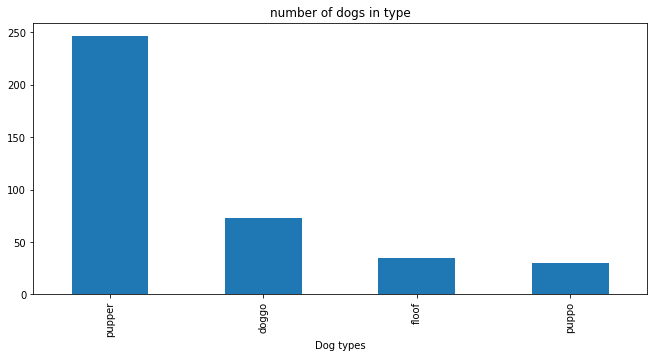

In [55]:
df1_clean['DogType'].value_counts()[1:5].plot('bar', figsize=(11,5), title='number of dogs in type').set_xlabel("Dog types")
plt.savefig('DogType')

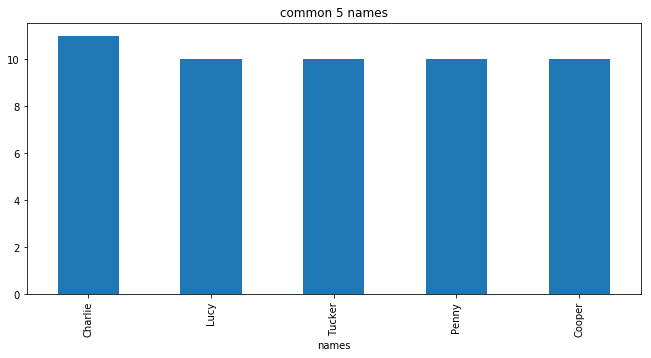

In [56]:
df1_clean.name.value_counts()[1:6].plot('bar', figsize=(11,5), title='common 5 names').set_xlabel("names")
plt.savefig('Common_names')